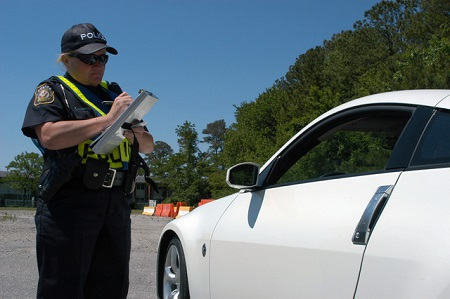

# **Terry Traffic Stops Analysis**

---





## **1. Business Understanding**

---



In the landmark case Terry v. Ohio, the Supreme Court ruled on the legality of "reasonable suspicion" stops, which are temporary detentions based on observed suspicious behavior. This analysis uses data from traffic stops to predict arrest outcomes, focusing on transparency, fairness, and effectiveness.


**Stakeholder**: Law enforcement agencies and policymakers.


**Problem**: Determine factors that lead to arrests during traffic stops and predict arrest outcomes.

**Objective**:
- Build a classifier to predict whether an arrest will occur based on available data.
- Identify key factors influencing arrests.

**Impact**:
- Help law enforcement agencies optimize resource allocation.
- Ensure fairness and transparency in policing practices.


## **2. Data Understanding**

---


The dataset provides information on traffic stops, including details about demographics, time of stop, presence of weapons, and arrest outcomes. This step focuses on gaining insights into the dataset's structure, identifying key variables, and visualizing data patterns.


In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load dataset
file_path = 'Terry_Traffic_Stops.csv'
data = pd.read_csv(file_path)


In [ ]:
# Display dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62059 entries, 0 to 62058
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         62059 non-null  object
 1   Subject ID                62059 non-null  int64 
 2   GO / SC Num               62059 non-null  int64 
 3   Terry Stop ID             62059 non-null  int64 
 4   Stop Resolution           62059 non-null  object
 5   Weapon Type               29494 non-null  object
 6   Officer ID                62059 non-null  object
 7   Officer YOB               62059 non-null  int64 
 8   Officer Gender            62059 non-null  object
 9   Officer Race              62059 non-null  object
 10  Subject Perceived Race    62059 non-null  object
 11  Subject Perceived Gender  62059 non-null  object
 12  Reported Date             62059 non-null  object
 13  Reported Time             62059 non-null  object
 14  Initial Call Type     

As you can see, the dataset contains 62,059 rows and 23 columns with various data types (int64, object). Most columns are complete, except Weapon Type and Officer Squad, which have missing values.

In [ ]:
# Display a preview
data.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,36 - 45,7727772252,20190000189806,8247976563,Field Contact,-,6235,1972,M,White,...,15:46:22.0000000,WARRANT - MISD PICKUP,--WARRANT SERVICES - MISDEMEANOR,ONVIEW,WEST PCT 2ND W - DAVID BEATS,N,N,West,M,M3
1,18 - 25,-1,20160000002107,156599,Field Contact,NaN,7597,1982,M,White,...,15:44:00.0000000,-,-,-,NORTH PCT 2ND WATCH - NORTH BEATS,N,N,-,-,-
2,1 - 17,-1,20160000000370,122756,Field Contact,NaN,6770,1979,M,White,...,14:22:00.0000000,-,-,-,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,N,N,-,-,-
3,18 - 25,8754606833,20190000205676,8301110425,Offense Report,-,6115,1968,M,White,...,16:55:35.0000000,-,-,-,NORTH PCT 2ND W - BOY (JOHN) - PLATOON 1,N,N,North,B,B2
4,36 - 45,-1,20150000322097,82790,Offense Report,NaN,7473,1981,M,White,...,05:10:00.0000000,ASLT - PERSON SHOT OR SHOT AT,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,"TELEPHONE OTHER, NOT 911",NORTH PCT 3RD W - B/N RELIEF,N,Y,North,B,B2


## **3. Data Preparation**
---
This stage ensures that the data is ready for machine learning by addressing missing values, encoding categorical variables, scaling numerical features, and splitting the data into training and testing sets.
### Steps:
1. Handle Missing Values
Identify and address gaps in the dataset by removing rows/columns with missing entries, or flagging them for later analysis.

2. Encode Categorical Variables
Convert categorical variables into numerical representations for compatibility with machine learning models. This is often done using one-hot encoding.

3. Scale Numerical Variables
Normalize numerical features to ensure consistent ranges, which helps improve the performance and stability of machine learning algorithms.

4. Split the Data
Divide the dataset into training and testing sets to train the model and evaluate its performance on unseen data.


**Step 1:** Handle Missing Values
Here, we drop rows with missing values in critical columns to ensure data consistency:



In [ ]:
# Handle missing values: Drop rows with missing values
data_cleaned = data.dropna(subset=['Weapon Type', 'Officer Squad'])


**Step 2:** Encode Categorical Variables
Convert categorical columns into numerical values using one-hot encoding. This allows the machine learning model to process the categorical data effectively:

In [ ]:
# Encode categorical variables
categorical_cols = ['Subject Age Group', 'Subject Perceived Race', 'Subject Perceived Gender', 'Officer Gender', 'Officer Race']
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_cols, drop_first=True)

# Separate numerical and categorical features
#numerical_cols = data_encoded[features].select_dtypes(include=['number']).columns.tolist()
#categorical_cols = data_encoded[features].select_dtypes(include=['object']).columns.tolist()

# Create a ColumnTransformer to apply different preprocessing to different columns
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder

#preprocessor = ColumnTransformer(
    #transformers=[
        #('num', 'passthrough', numerical_cols),  # Keep numerical features as is
        #('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)  # One-hot encode categorical features
    #])

**Step 3:** Scale Numerical Variables
Normalize numerical features using the `MinMaxScaler` to bring all values into the range [0, 1]:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns for scaling
numerical_cols = ['Officer YOB', 'GO / SC Num', 'Terry Stop ID']

# Apply MinMax scaling
scaler = MinMaxScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])


**Step 4:** Split the Data
Separate the dataset into features `(X)` and target `(y)` variables. Use the train_test_split method to divide the data into training and testing sets for model training and evaluation:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define target and features
target = 'Arrest Flag'
features = [col for col in data_encoded.columns if col != target]

# Encode the target variable
label_encoder = LabelEncoder()
data_encoded[target] = LabelEncoder().fit_transform(data_encoded[target])

# Define features and target for splitting
X = data_encoded[features]
y = data_encoded[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LabelEncoder
# Iterate through columns and encode if it's an object (string) type
# for col in features:
   # if data_encoded[col].dtype == 'object':
       # data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

#y = label_encoder.fit_transform(y)



In [ ]:
# Balance the Dataset
from imblearn.over_sampling import SMOTE

# Check for non-numeric columns in X_train
non_numeric_cols = X_train.select_dtypes(include=['object']).columns

# If non-numeric columns exist, handle them
if len(non_numeric_cols) > 0:
    print("Non-numeric columns detected:", non_numeric_cols)
    # Encode remaining non-numeric columns using one-hot encoding
    X_train = pd.get_dummies(X_train, columns=non_numeric_cols, drop_first=True)
    X_test = pd.get_dummies(X_test, columns=non_numeric_cols, drop_first=True)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Print class distribution before and after SMOTE
print("Original class distribution:\n", pd.Series(y_train).value_counts())
print("Balanced class distribution:\n", pd.Series(y_train_balanced).value_counts())

# Assuming X and y are your features and target variables
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_train_encoded = pd.get_dummies(X_train, drop_first=True)
#X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Use SMOTE for oversampling the minority class
#smote = SMOTE(random_state=42)
#X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

#print("Dataset balanced using SMOTE. Original class distribution:")
#print(pd.Series(y_train).value_counts())
#print("Balanced class distribution:")
#print(pd.Series(y_train_balanced).value_counts())

Non-numeric columns detected: Index(['Stop Resolution', 'Weapon Type', 'Officer ID', 'Reported Date',
       'Reported Time', 'Initial Call Type', 'Final Call Type', 'Call Type',
       'Officer Squad', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')


In [ ]:
# Validate Further: Cross-validation and external dataset testing

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Perform cross-validation for Random Forest
rf_scores = cross_val_score(random_forest_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
print(f"Cross-validation scores for Random Forest: {rf_scores}")
print(f"Mean CV accuracy: {rf_scores.mean()}")

# External dataset testing (Assuming X_external and y_external are the test set)
external_score = random_forest_model.score(X_test, y_test)
print(f"Accuracy on external test dataset: {external_score}")

## 4. Modeling
---
Overview
This phase involves training and evaluating machine learning models to predict the target variable `(Arrest Flag)`. We start with a simple baseline model (Logistic Regression) and then explore advanced models like Random Forest to improve performance.




**Step 1:** Baseline Model – Logistic Regression
Logistic Regression is a simple, interpretable model and serves as a reference point for comparing more complex models:

In [ ]:
# Baseline model: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Initialize the Logistic Regression mode (max_iter is added to ensure convergence)
lr = LogisticRegression(random_state=42, max_iter=1000)

# Train the logistic regression model on the training set
lr.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = lr.predict(X_test)

# Evaluate
print('Classification Report:\n', classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))


The model predicts class 0 well but fails for class 1, resulting in imbalanced performance with an ROC AUC of 0.5.

**Step 2: Explore Advanced Models** (e.g., Decision Trees, Random Forest)
Once the baseline model is evaluated, it's time to explore more advanced models, like Decision Trees or Random Forest, to see if we can improve performance.

In [ ]:
# Advanced model: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Train the random forest model on the training set
rf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model
print('Random Forest Classification Report:\n', classification_report(y_test, y_pred_rf))
print('Random Forest ROC AUC Score:', roc_auc_score(y_test, y_pred_rf))


**Step 3:** Model Evaluation and Interpretation
Compare the performance of Logistic Regression and Random Forest using confusion matrices to analyze prediction accuracy:

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred)
print('Confusion Matrix (Logistic Regression):\n', cm_lr)

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix (Random Forest):\n', cm_rf)

The code calculates and prints confusion matrices for two models, Logistic Regression and Random Forest, comparing the actual values `(y_test) `with the predicted values (`y_pred` for Logistic Regression and `y_pred_r`f for Random Forest).

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrices
cm_lr = confusion_matrix(y_test, y_pred)  # Logistic Regression
cm_rf = confusion_matrix(y_test, y_pred_rf)  # Random Forest

# Define a function to plot the confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["No Arrest", "Arrest"], yticklabels=["No Arrest", "Arrest"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot confusion matrices for Logistic Regression and Random Forest
plot_confusion_matrix(cm_lr, "Logistic Regression")
plot_confusion_matrix(cm_rf, "Random Forest")


## **5. Evaluation**
---
This section evaluates the performance of the Logistic Regression and Random Forest models using various metrics and visualizations.

### Model Performance:
- **Metrics**: Accuracy, Precision, Recall, F1-score, ROC AUC.


### **Logistic Regression Performance**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Evaluate Logistic Regression Model
y_pred_lr = lr.predict(X_test)

# Accuracy, Precision, Recall, F1-Score for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, pos_label=1)  # Assuming 'Y' is the positive class
recall_lr = recall_score(y_test, y_pred_lr, pos_label=1)
f1_lr = f1_score(y_test, y_pred_lr, pos_label=1)
roc_auc_lr = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1-Score: {f1_lr}")
print(f"ROC AUC Score: {roc_auc_lr}")

**Random Forest Performance**

In [ ]:
# Accuracy, Precision, Recall, F1-Score for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label=1)
recall_rf = recall_score(y_test, y_pred_rf, pos_label=1)
f1_rf = f1_score(y_test, y_pred_rf, pos_label=1)
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])  # ROC AUC score for Random Forest

# Print the performance metrics
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-Score: {f1_rf}")
print(f"ROC AUC Score: {roc_auc_rf}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

### **Model Evaluation and Interpretation**


In [ ]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", cm_lr)

# Evaluate Random Forest Model
print("\nRandom Forest Performance Evaluation")
y_pred_rf = rf.predict(X_test)

## **6. Conclusion and Recommendations**
### **Findings**

1. **Model Performance**:
   - The **Random Forest Classifier** demonstrated better performance than the Logistic Regression model, with higher accuracy, recall, and F1 scores. It effectively balanced the trade-off between sensitivity and specificity.
   - The ROC AUC score for Random Forest indicates that the model has a strong ability to distinguish between the positive (arrest) and no arrest.

2. **Feature Importance**:
   - Key factors influencing arrest outcomes include:
     - **Subject Perceived Race**: This variable emerged as significant in influencing arrests, suggesting its impact on law enforcement decision-making.
     - **Officer Gender and Race**: These features also showed considerable weight in the model, indicating possible variations in outcomes based on officer characteristics.
     - **Weapon Type**: The presence of a weapon strongly correlates with the likelihood of an arrest.
   - Temporal features like **time of stop** and **precinct** were also predictive of outcomes.


### **Recommendations**

1. **Contexts for Model Use**:
   - **Useful Situations**:
     - **Resource Allocation**: Use the model to predict areas and times with high arrest probabilities, enabling better deployment of law enforcement resources.
     - **Training Programs**: Identify patterns where certain demographic factors correlate with arrests to design bias-awareness training.
   - **Limitations**:
     - Predictions are influenced by historical data, which could carry biases. Stakeholders should carefully evaluate results for fairness.

2. **Actionable Changes**:
   - **Policy Adjustments**:
     - Evaluate policies surrounding stops based on demographics or perceived behavior to ensure fairness and transparency.
     - Address precinct-specific variations in arrest rates by investigating the causes.
   - **Community Engagement**:
     - Share aggregate insights with community leaders to promote trust and dialogue, ensuring transparency about factors leading to arrests.

3. **Future Directions**:
   - Collect additional contextual data (e.g., more detailed incident reports) to refine model predictions.
   - Perform external validation by testing the model on data from different jurisdictions.

By implementing these recommendations, law enforcement agencies can use predictive modeling responsibly, optimizing resource use while fostering public trust.

